# KNN no `chb02_com_dwt`

Explorando 20 rodadas de classificação com `KNN` em sua configuração padrão com o dataframe extraído com DWT para encontrar canal com melhor desempenho.

Por fim salvando o array com a ordem do melhor desempenho

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

seed_array = np.load('./../20_seeds.npy')
print(f'seeds: {seed_array}')

seeds: [4382 8968 8442 1729  290  490 2128 1167 8900 5078 1359  894 7809 6990
 3623 5906 1687 7080 5473 7854]


## 20 rodadas

In [2]:
chb_DF = pd.read_csv('./chb02_com_dwt.csv')
target_S = chb_DF.pop('target')

accuracy_DF = pd.DataFrame()

# agrupa todas colunas pelo mesmo número do canal
colunas_agrupadas_por_numero = []
for i in range(18):
    colunas_agrupadas_por_numero.append(
        [column for column in chb_DF.columns if f'{i}' in column.split('-')]
    )

for numero_da_coluna, colunas in enumerate(colunas_agrupadas_por_numero):
    X, y = chb_DF[colunas].values, target_S.values

    acc = []   

    for seed in seed_array:
        # Distribuindo os dados
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
        
        # Instanciando e treinando classificador
        model = KNeighborsClassifier().fit(X_train, y_train)

        # Adicionando resultados às respectivas listas
        acc.append(model.score(X_test, y_test))

    accuracy_DF[f'{numero_da_coluna}'] = acc

accuracy_DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.862745,0.901961,0.921569,0.941176,0.901961,0.823529,0.862745,0.882353,0.803922,0.843137,0.764706,0.705882,0.666667,0.901961,0.980392,0.901961,0.764706,0.803922
1,0.843137,0.921569,0.921569,0.960784,0.784314,0.705882,0.921569,0.901961,0.686275,0.784314,0.862745,0.686275,0.725490,0.901961,0.960784,0.901961,0.686275,0.843137
2,0.784314,0.882353,0.960784,0.960784,0.764706,0.823529,0.901961,0.941176,0.882353,0.823529,0.666667,0.745098,0.686275,0.862745,1.000000,0.941176,0.803922,0.764706
3,0.745098,0.803922,0.882353,0.901961,0.784314,0.764706,0.784314,0.882353,0.745098,0.784314,0.745098,0.745098,0.627451,0.784314,0.941176,0.843137,0.666667,0.745098
4,0.784314,0.862745,0.941176,0.960784,0.823529,0.686275,0.941176,0.960784,0.784314,0.803922,0.784314,0.784314,0.666667,0.862745,0.960784,0.941176,0.745098,0.862745
5,0.843137,0.921569,0.941176,0.921569,0.823529,0.823529,0.882353,0.941176,0.784314,0.882353,0.803922,0.764706,0.823529,0.901961,0.980392,0.882353,0.803922,0.843137
6,0.862745,0.921569,0.941176,0.921569,0.901961,0.784314,0.921569,0.921569,0.647059,0.803922,0.843137,0.686275,0.725490,0.843137,0.980392,0.901961,0.705882,0.882353
7,0.745098,0.921569,1.000000,0.960784,0.764706,0.686275,0.901961,0.960784,0.784314,0.823529,0.705882,0.764706,0.607843,0.862745,0.980392,0.901961,0.784314,0.764706
8,0.745098,0.862745,0.901961,0.901961,0.784314,0.764706,0.862745,0.901961,0.803922,0.764706,0.803922,0.784314,0.686275,0.823529,0.921569,0.823529,0.686275,0.823529
9,0.823529,0.921569,0.901961,0.921569,0.843137,0.705882,0.843137,0.862745,0.803922,0.823529,0.784314,0.882353,0.745098,0.901961,0.980392,0.941176,0.705882,0.764706


,count,mean,std,min,25%,50%,75%,max
14,20.0,0.967647,0.022288,0.921569,0.960784,0.980392,0.980392,1.000000
2,20.0,0.942157,0.032109,0.882353,0.921569,0.941176,0.965686,1.000000
3,20.0,0.933333,0.030773,0.882353,0.916667,0.931373,0.960784,1.000000
7,20.0,0.914706,0.046433,0.823529,0.882353,0.921569,0.960784,0.980392
15,20.0,0.894118,0.035076,0.823529,0.882353,0.901961,0.906863,0.941176
1,20.0,0.887255,0.035916,0.803922,0.862745,0.901961,0.921569,0.921569
6,20.0,0.883333,0.041946,0.784314,0.862745,0.882353,0.906863,0.960784
13,20.0,0.863725,0.036253,0.784314,0.843137,0.862745,0.901961,0.921569
4,20.0,0.819608,0.042006,0.764706,0.784314,0.823529,0.843137,0.901961
17,20.0,0.817647,0.048906,0.725490,0.779412,0.823529,0.843137,0.921569


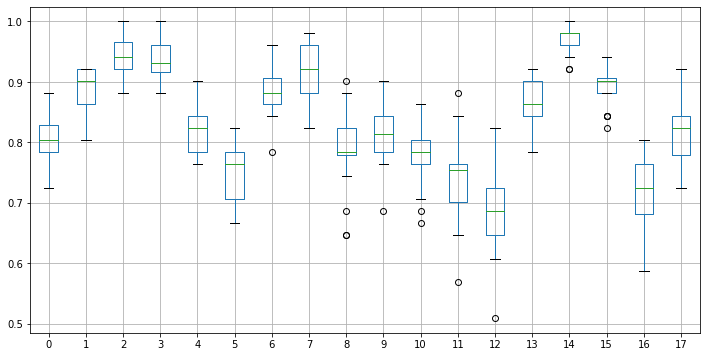

In [3]:
accuracy_DF.boxplot(figsize=(12, 6))
accuracy_DF.describe().transpose().sort_values(by='mean', ascending=False)

## Salvando rank em arquivo csv

In [4]:
save_DF = accuracy_DF.describe().transpose()[['mean', 'std', '50%']]
save_DF['chb'] = '02'
save_DF['channel'] = save_DF.index

save_DF.to_csv(path_or_buf='./knn_descr_channel_rank.csv', index=False)

In [5]:
save_DF

,mean,std,50%,chb,channel
0,0.805882,0.043100,0.803922,02,0
1,0.887255,0.035916,0.901961,02,1
2,0.942157,0.032109,0.941176,02,2
3,0.933333,0.030773,0.931373,02,3
4,0.819608,0.042006,0.823529,02,4
5,0.750980,0.054018,0.764706,02,5
6,0.883333,0.041946,0.882353,02,6
7,0.914706,0.046433,0.921569,02,7
8,0.784314,0.064876,0.784314,02,8
9,0.812745,0.047808,0.813725,02,9
